## 7.2	时间序列的基本操作

### 7.2.1	创建带时间戳的时间序列

In [1]:
import pandas as pd
# 创建DatetimeIndex类的对象
date_index = pd.to_datetime(['20230110', '20230115', '20230118'])
date_index

DatetimeIndex(['2023-01-10', '2023-01-15', '2023-01-18'], dtype='datetime64[ns]', freq=None)

In [2]:
# 创建Series类的对象并指定索引
date_ser = pd.Series([11, 22, 33], index=date_index)
date_ser

2023-01-10    11
2023-01-15    22
2023-01-18    33
dtype: int64

In [3]:
from datetime import datetime
import pandas as pd
date_list = [datetime(2023, 1, 10), datetime(2023, 1, 15), datetime(2023, 1, 18)]
# 创建Series类的对象，并指定该对象的索引是包含日期的列表
time_ser = pd.Series([11, 22, 33], index=date_list)
time_ser

2023-01-10    11
2023-01-15    22
2023-01-18    33
dtype: int64

In [4]:
data_demo = [[11, 22, 33], [44, 55, 66], [77, 88, 99], [12, 23, 34]]
date_list = [datetime(2023, 1, 23), datetime(2023, 2, 15),
             datetime(2023, 5, 22), datetime(2023, 3, 30)]
# 创建DataFrame类的对象，并指定索引是包含日期的列表
time_df = pd.DataFrame(data_demo, index=date_list)
time_df

,0,1,2
2023-01-23,11,22,33
2023-02-15,44,55,66
2023-05-22,77,88,99
2023-03-30,12,23,34


### 7.2.2	获取时间序列子集

In [1]:
import pandas as pd
import numpy as np
date_list = ['2020/05/30', '2022/02/01', '2020.6.1', '2021.4.1', '2022.6.1', '2023.1.23']
# 根据日期字符串生成DatetimeIndex类的对象
date_index = pd.to_datetime(date_list)
# 创建Series类的对象，并指定索引是DatetimeIndex
date_ser = pd.Series(np.arange(6), index=date_index)
date_ser

2020-05-30    0
2022-02-01    1
2020-06-01    2
2021-04-01    3
2022-06-01    4
2023-01-23    5
dtype: int32

In [2]:
# 通过位置索引获取时间序列的数据
date_ser[3]

3

In [3]:
from datetime import datetime
# 通过datetime对象获取时间序列的数据
date_time = datetime(2020, 6, 1)
date_ser[date_time]

2

In [4]:
date_ser['20200530']

0

In [5]:
date_ser['2020-05-30']

0

In [6]:
date_ser['2020/05/30']

0

In [7]:
date_ser['5/30/2020']

0

In [8]:
date_ser['2020']    # 获取2020年的所有数据 

2020-05-30    0
2020-06-01    2
dtype: int32

In [9]:
# 截取2022-1-1之后的数据
sorted_ser = date_ser.sort_index()
sorted_ser.truncate(before='2022-1-1')

2022-02-01    1
2022-06-01    4
2023-01-23    5
dtype: int32

In [12]:
# 截取2020年6月1日之前的数据
sorted_ser.truncate(after='2020-6-1')

2020-05-30    0
2020-06-01    2
dtype: int32

## 7.3	固定频率的时间序列

### 7.3.1	创建固定频率的时间序列

In [16]:
import pandas as pd
# 创建DatetimeIndex类的对象，指定起始日期与终止日期
date_ran = pd.date_range('2023/01/01', '2023/01/10')
date_ran

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [17]:
import pandas as pd
# 创建DatetimeIndex类的对象，指定起始日期和个数
date_ran = pd.date_range(start='2023/01/01', periods=5)
date_ran

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# 创建DatetimeIndex类的对象，指定终止日期和个数
date_ran = pd.date_range(end='2023/01/10', periods=5)
date_ran

DatetimeIndex(['2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
dates_index = pd.date_range(start='2023-01-01', periods=5, freq='5D') 
dates_index

DatetimeIndex(['2023-01-01', '2023-01-06', '2023-01-11', '2023-01-16',
               '2023-01-21'],
              dtype='datetime64[ns]', freq='5D')

In [21]:
dates_index = pd.date_range(start='2023-01-01 12:30:11', periods=5, freq='5D')
dates_index

DatetimeIndex(['2023-01-01 12:30:11', '2023-01-06 12:30:11',
               '2023-01-11 12:30:11', '2023-01-16 12:30:11',
               '2023-01-21 12:30:11'],
              dtype='datetime64[ns]', freq='5D')

In [22]:
# 创建DatetimeIndex类的对象，指定时区
pd.date_range(start='2023/1/1 12:30:11', periods=5, tz='Asia/Hong_Kong')

DatetimeIndex(['2023-01-01 12:30:11+08:00', '2023-01-02 12:30:11+08:00',
               '2023-01-03 12:30:11+08:00', '2023-01-04 12:30:11+08:00',
               '2023-01-05 12:30:11+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

In [23]:
# 创建DatetimeIndex类的对象，标准化时间
pd.date_range(start='2023/1/1 12:30:11', periods=5, tz='Asia/Hong_Kong', normalize=True)

DatetimeIndex(['2023-01-01 00:00:00+08:00', '2023-01-02 00:00:00+08:00',
               '2023-01-03 00:00:00+08:00', '2023-01-04 00:00:00+08:00',
               '2023-01-05 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

In [3]:
date_ser = pd.Series([12, 56, 89, 99, 31], index=dates_index)
date_ser

2023-01-01 12:30:11    12
2023-01-06 12:30:11    56
2023-01-11 12:30:11    89
2023-01-16 12:30:11    99
2023-01-21 12:30:11    31
Freq: 5D, dtype: int64

### 7.3.2	时间序列的频率与偏移量

In [14]:
from pandas.tseries.offsets import *
DateOffset(days=14, hours=10)

<DateOffset: days=14, hours=10>

In [15]:
 Week(2) + Hour(10)

Timedelta('14 days 10:00:00')

In [16]:
# 生成日期偏移量
date_offset  = Week(2) + Hour(10)
pd.date_range('2023/1/1', '2023/1/31', freq=date_offset)

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-15 10:00:00',
               '2023-01-29 20:00:00'],
              dtype='datetime64[ns]', freq='346H')

### 7.3.3	时间序列的移动

In [17]:
import numpy as np
import pandas as pd
date_index = pd.date_range('2023/01/01', periods=5)
time_ser = pd.Series(np.arange(5) + 1, index=date_index)
time_ser

2023-01-01    1
2023-01-02    2
2023-01-03    3
2023-01-04    4
2023-01-05    5
Freq: D, dtype: int32

In [18]:
# 向后移动一次
time_ser.shift(1)

2023-01-01    NaN
2023-01-02    1.0
2023-01-03    2.0
2023-01-04    3.0
2023-01-05    4.0
Freq: D, dtype: float64

In [19]:
# 向前移动一次
time_ser.shift(-1)

2023-01-01    2.0
2023-01-02    3.0
2023-01-03    4.0
2023-01-04    5.0
2023-01-05    NaN
Freq: D, dtype: float64

## 7.4	时间周期与计算

### 7.4.1	创建带时期索引的对象

In [38]:
# 创建Period对象，表示的是从2023-01-01到2023-12-31之间的时期
pd.Period(2023)

Period('2023', 'A-DEC')

In [39]:
# 创建Period对象，表示的是从2023-06-01到2023-06-30之间的整月时间
period = pd.Period('2023/6')
period

Period('2023-06', 'M')

In [40]:
period + 1   # Period对象加上一个整数

Period('2023-07', 'M')

In [41]:
period - 5    # Period对象减去一个整数

Period('2023-01', 'M')

In [42]:
# 创建一个与period频率相同的Period对象
other_period = pd.Period(202301, freq='M' )
period - other_period

<5 * MonthEnds>

In [43]:
period_index = pd.period_range('2023.1.8', '2023.5.31', freq='M')
period_index

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05'], dtype='period[M]')

In [44]:
str_list = ['2021', '2022', '2023']
pd.PeriodIndex(str_list, freq='A-DEC')

PeriodIndex(['2021', '2022', '2023'], dtype='period[A-DEC]')

In [45]:
period_ser = pd.Series(np.arange(5), period_index)
period_ser

2023-01    0
2023-02    1
2023-03    2
2023-04    3
2023-05    4
Freq: M, dtype: int32

### 7.4.2	时期的频率转换

In [46]:
# 创建时期对象
period = pd.Period('2022', freq='A-DEC')
# 转换时期频率
period.asfreq('M', how='start')

Period('2022-01', 'M')

In [47]:
period.asfreq('M', how='end')

Period('2022-12', 'M')

## 7.5	重采样

### 7.5.1	重采样方法

In [50]:
date_index = pd.date_range('2023.1.8', periods=30)
time_ser = pd.Series(np.arange(30), index=date_index)
time_ser

2023-01-08     0
2023-01-09     1
2023-01-10     2
2023-01-11     3
2023-01-12     4
2023-01-13     5
2023-01-14     6
2023-01-15     7
2023-01-16     8
2023-01-17     9
2023-01-18    10
2023-01-19    11
2023-01-20    12
2023-01-21    13
2023-01-22    14
2023-01-23    15
2023-01-24    16
2023-01-25    17
2023-01-26    18
2023-01-27    19
2023-01-28    20
2023-01-29    21
2023-01-30    22
2023-01-31    23
2023-02-01    24
2023-02-02    25
2023-02-03    26
2023-02-04    27
2023-02-05    28
2023-02-06    29
Freq: D, dtype: int32

In [51]:
time_ser.resample('W-MON').mean()

2023-01-09     0.5
2023-01-16     5.0
2023-01-23    12.0
2023-01-30    19.0
2023-02-06    26.0
Freq: W-MON, dtype: float64

In [52]:
time_ser.resample('W-MON', closed='left').mean()

2023-01-09     0.0
2023-01-16     4.0
2023-01-23    11.0
2023-01-30    18.0
2023-02-06    25.0
2023-02-13    29.0
Freq: W-MON, dtype: float64

### 7.5.2	降采样

In [54]:
date_index = pd.date_range('2023/02/01', periods=30)
shares_data = np.random.rand(30)
time_ser = pd.Series(shares_data, index=date_index)
time_ser

2023-02-01    0.327132
2023-02-02    0.530474
2023-02-03    0.911379
2023-02-04    0.614087
2023-02-05    0.369396
2023-02-06    0.516068
2023-02-07    0.365604
2023-02-08    0.729291
2023-02-09    0.503517
2023-02-10    0.938456
2023-02-11    0.057541
2023-02-12    0.556443
2023-02-13    0.376873
2023-02-14    0.578967
2023-02-15    0.100132
2023-02-16    0.076872
2023-02-17    0.373170
2023-02-18    0.084494
2023-02-19    0.105077
2023-02-20    0.940161
2023-02-21    0.450677
2023-02-22    0.855182
2023-02-23    0.053711
2023-02-24    0.529553
2023-02-25    0.577550
2023-02-26    0.220046
2023-02-27    0.688848
2023-02-28    0.615016
2023-03-01    0.593345
2023-03-02    0.249745
Freq: D, dtype: float64

In [57]:
time_ser.resample('7D').ohlc()  # OHLC重采样

,open,high,low,close
2023-02-01,0.327132,0.911379,0.327132,0.365604
2023-02-08,0.729291,0.938456,0.057541,0.578967
2023-02-15,0.100132,0.940161,0.076872,0.450677
2023-02-22,0.855182,0.855182,0.053711,0.615016
2023-03-01,0.593345,0.593345,0.249745,0.249745


In [58]:
# 通过groupby技术实现降采样
time_ser.groupby(lambda x: x.week).mean()

C:\Users\itcast\AppData\Local\Temp\ipykernel_11488\1333423618.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  time_ser.groupby(lambda x: x.week).mean()


5    0.550494
6    0.523846
7    0.242226
8    0.518126
9    0.536738
dtype: float64

### 7.5.3	升采样

In [61]:
data_demo = np.array([['101', '210', '150'], ['330', '460', '580']])
date_index = pd.date_range('2022/06/10', periods=2, freq='W-SUN')
time_df = pd.DataFrame(data_demo, index=date_index, 
columns=['A产品', 'B产品', 'C产品'])
time_df

,A产品,B产品,C产品
2022-06-12,101,210,150
2022-06-19,330,460,580


In [62]:
time_df.resample('D').asfreq()

            A产品  B产品  C产品
2022-06-12  101  210  150
2022-06-13  NaN  NaN  NaN
2022-06-14  NaN  NaN  NaN
2022-06-15  NaN  NaN  NaN
2022-06-16  NaN  NaN  NaN
2022-06-17  NaN  NaN  NaN
2022-06-18  NaN  NaN  NaN
2022-06-19  330  460  580


In [63]:
time_df.resample('D').ffill()

            A产品  B产品  C产品
2022-06-12  101  210  150
2022-06-13  101  210  150
2022-06-14  101  210  150
2022-06-15  101  210  150
2022-06-16  101  210  150
2022-06-17  101  210  150
2022-06-18  101  210  150
2022-06-19  330  460  580


## 7.6	滑动窗口

In [8]:
import numpy as np
import pandas as pd
year_data = np.random.randint(low=50, high=100, size=(365,))
date_index = pd.date_range('2022-01-01', '2022-12-31', freq='D')
ser = pd.Series(year_data, date_index)
ser.head()

2022-01-01    90
2022-01-02    73
2022-01-03    78
2022-01-04    66
2022-01-05    68
Freq: D, dtype: int32

In [9]:
roll_window = ser.rolling(window=10)
roll_window

Rolling [window=10,center=False,axis=0,method=single]

In [12]:
roll_window.mean()

2022-01-01     NaN
2022-01-02     NaN
2022-01-03     NaN
2022-01-04     NaN
2022-01-05     NaN
              ... 
2022-12-27    77.0
2022-12-28    76.6
2022-12-29    77.4
2022-12-30    77.6
2022-12-31    75.7
Freq: D, Length: 365, dtype: float64

<AxesSubplot:>

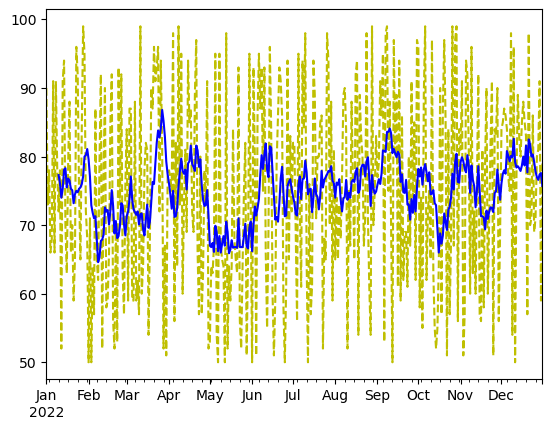

In [13]:
import matplotlib.pyplot as plt
# 直接通过Series类的对象调用plot()方法绘制折线图
ser.plot(style='y--')
ser_window = ser.rolling(window=10).mean()
# 直接通过Series类的对象调用plot()方法绘制折线图
ser_window.plot(style='b')

## 7.7	案例：某城市报警记录分析

### 7.7.1 案例需求

In [7]:
# （1）统计2022年3月到5月哪种类别的报警记录最多，哪种类别的报警记录最少
# （2）画图分析2022年1~10月每周报警记录的数量
# （3）画图分析2022年1~10月周一至周日交通事故和非交通事故的报警记录

### 7.7.2 数据准备

In [1]:
import pandas as pd
alarm_record = pd.read_csv(r'C:\Users\itcast\Desktop\alarm.csv', parse_dates=['REPORTED_DATE'])
alarm_record.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
0,traffic-accident,traffic-accident,2022-05-22 14:41:00,-104.673812,39.849292,0,1
1,threats-to-injure,public-disorder,2022-05-17 20:35:00,-105.020053,39.694351,1,0
2,burglary-residence-by-force,burglary,2022-06-07 07:47:00,-104.981677,39.763597,1,0
3,theft-other,larceny,2022-05-26 16:46:00,-104.839119,39.769694,1,0
4,criminal-trespassing,all-other-crimes,2022-06-07 07:42:00,-104.673812,39.849292,1,0


In [2]:
alarm_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65617 entries, 0 to 65616
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OFFENSE_TYPE_ID      65617 non-null  object        
 1   OFFENSE_CATEGORY_ID  65617 non-null  object        
 2   REPORTED_DATE        65617 non-null  datetime64[ns]
 3   GEO_LON              65617 non-null  float64       
 4   GEO_LAT              65617 non-null  float64       
 5   IS_CRIME             65617 non-null  int64         
 6   IS_TRAFFIC           65617 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.5+ MB


In [3]:
# 把REPORTED_DATE列的数据作为行的标签索引
final_alarm_record = alarm_record.set_index('REPORTED_DATE')
final_alarm_record.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,
2022-05-22 14:41:00,traffic-accident,traffic-accident,-104.673812,39.849292,0,1
2022-05-17 20:35:00,threats-to-injure,public-disorder,-105.020053,39.694351,1,0
2022-06-07 07:47:00,burglary-residence-by-force,burglary,-104.981677,39.763597,1,0
2022-05-26 16:46:00,theft-other,larceny,-104.839119,39.769694,1,0
2022-06-07 07:42:00,criminal-trespassing,all-other-crimes,-104.673812,39.849292,1,0


### 7.7.3 案例实现

#### 1.  统计2022年3月到5月哪种类别的报警记录最多，哪种类别的报警记录最少

In [4]:
# 查询2022年3月到5月的报警记录
record_3_5 = final_alarm_record.loc['2022-03-01': '2022-05-31'].sort_index()
record_3_5

C:\Users\itcast\AppData\Local\Temp\ipykernel_11892\3298808133.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  record_3_5 = final_alarm_record.loc['2022-03-01': '2022-05-31'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,
2022-03-01 00:07:00,traf-other,all-other-crimes,-104.799964,39.798282,1,0
2022-03-01 00:07:00,assault-dv,other-crimes-against-persons,-104.889641,39.752364,1,0
2022-03-01 00:26:00,traffic-accident-hit-and-run,traffic-accident,-104.846448,39.779922,0,1
2022-03-01 00:30:00,criminal-mischief-other,public-disorder,-105.057143,39.654277,1,0
2022-03-01 00:42:00,obstructing-govt-operation,all-other-crimes,-105.039012,39.628846,1,0
...,...,...,...,...,...,...
2022-05-31 23:22:00,vehicular-eluding-no-chase,all-other-crimes,-104.978375,39.782895,1,0
2022-05-31 23:24:00,criminal-trespassing,all-other-crimes,-104.999951,39.753054,1,0
2022-05-31 23:31:00,burglary-residence-by-force,burglary,-105.034769,39.723257,1,0


In [5]:
# 根据OFFENSE_CATEGORY_ID列分组统计数量，得到每种类别报警记录的数量
result = record_3_5.groupby('OFFENSE_CATEGORY_ID').count()
new_result = result.sort_values(by='OFFENSE_TYPE_ID')
new_result

,OFFENSE_TYPE_ID,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
OFFENSE_CATEGORY_ID,,,,,
murder,15,15,15,15,15
arson,25,25,25,25,25
robbery,271,271,271,271,271
white-collar-crime,301,301,301,301,301
drug-alcohol,318,318,318,318,318
aggravated-assault,541,541,541,541,541
burglary,1051,1051,1051,1051,1051
auto-theft,1175,1175,1175,1175,1175
other-crimes-against-persons,1225,1225,1225,1225,1225


In [6]:
# 获取第一条报警记录
new_result.iloc[0:1]

,OFFENSE_TYPE_ID,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
OFFENSE_CATEGORY_ID,,,,,
murder,15,15,15,15,15


In [7]:
# 获取最后一条报警记录
new_result.iloc[-1:-2:-1]

,OFFENSE_TYPE_ID,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
OFFENSE_CATEGORY_ID,,,,,
traffic-accident,5928,5928,5928,5928,5928


#### 2.  画图分析2022 年1～10 月每周报警记录的数量

In [8]:
# 统计每周的报警记录，把周日作为每周的结束
weekly_alarm = final_alarm_record.resample('W').size()
weekly_alarm.head()

REPORTED_DATE
2022-01-02     422
2022-01-09    1487
2022-01-16    1588
2022-01-23    1721
2022-01-30    1679
Freq: W-SUN, dtype: int64

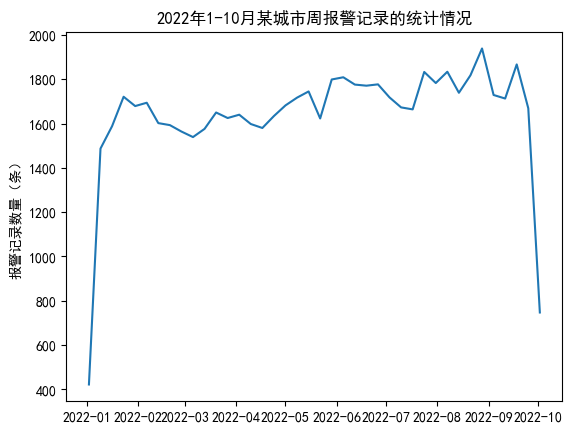

In [10]:
# 绘制折线图
import matplotlib.pyplot as plt
# 设置字体为简黑
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(weekly_alarm.index.values, weekly_alarm.values) 
plt.title('2022年1~10月某城市周报警记录的统计情况')
plt.ylabel('报警记录数量（条）')  
plt.show()

#### 3.  画图分析2022 年1～10 月周一至周日交通事故和非交通事故的报警记录

In [11]:
# 筛选出交通事故的记录
left = alarm_record[alarm_record['IS_TRAFFIC'] == 1]['REPORTED_DATE'].dt.weekday.value_counts()
left = left.sort_index()
left

0    2670
1    2831
2    2986
3    2983
4    1984
5    1691
6    2655
Name: REPORTED_DATE, dtype: int64

In [12]:
# 筛选出非交通事故的记录
right = alarm_record[alarm_record['IS_CRIME'] == 1]['REPORTED_DATE'].dt.weekday.value_counts()
right = right.sort_index()
right

0    7294
1    6993
2    6916
3    7040
4    6066
5    6082
6    7426
Name: REPORTED_DATE, dtype: int64

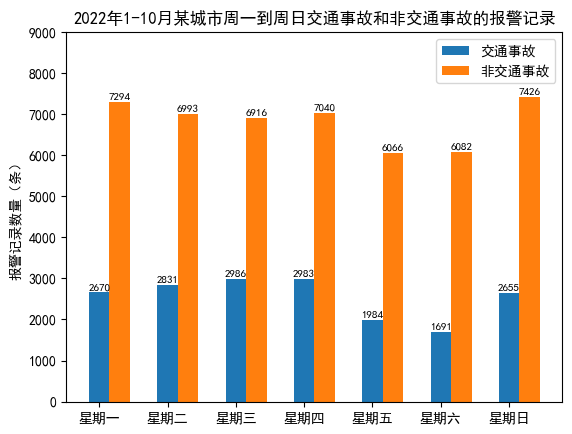

In [13]:
import numpy as np
x = np.arange(right.size)
bar_width = 0.3   # 柱形的宽度
rect_blue = plt.bar(x, left.values, tick_label=["星期一", "星期二", "星期三", "星期四", 
                                                "星期五", "星期六", "星期日"], width=bar_width)  
rect_orange = plt.bar(x+bar_width, right.values, width=bar_width)
# 添加标题
plt.title('2022年1~10月某城市周一至周日交通事故和非交通事故的报警记录')
# 设置y轴的标签和刻度范围
plt.ylabel('报警记录数量（条）')  
plt.ylim(0, 9000)
# 添加注释文本
def autolabel(rects):
    """在每个柱形上方添加注释文本"""
    for rect in rects:
        rect_height = rect.get_height()     
        rect_x = rect.get_x()                 
        rect_width = rect.get_width()        
        plt.text(rect_x + rect_width / 2, rect_height + 30, 
                 s='{}'.format(rect_height),
                 ha='center', va='bottom', fontsize=8)
autolabel(rect_blue)
autolabel(rect_orange)
# 添加图例
plt.legend([rect_blue, rect_orange], ['交通事故', '非交通事故'])
plt.show()